In [1]:
import os
data_dir = "/Users/nathzi1505/Downloads/cell_images"
os.listdir(data_dir)

['.DS_Store', 'test', 'train']

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from matplotlib.image import imread

In [4]:
train_path = data_dir + "/train/"
test_path = data_dir + "/test/"

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path + 'parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [8]:
para_cell = train_path + 'parasitized/' + 'C189P150ThinF_IMG_20151203_142224_cell_84.png'
imread(para_cell).shape

(121, 118, 3)

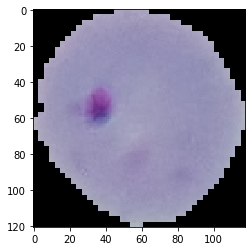

In [9]:
plt.imshow(imread(para_cell))

In [10]:
os.listdir(train_path + 'uninfected')[0]

'C13NThinF_IMG_20150614_131318_cell_179.png'

In [11]:
uninfected_cell = train_path + 'uninfected/' + 'C13NThinF_IMG_20150614_131318_cell_179.png'
imread(para_cell).shape

(121, 118, 3)

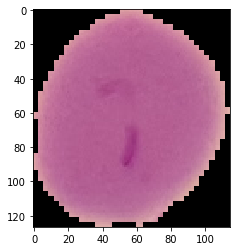

In [12]:
plt.imshow(imread(uninfected_cell))

In [13]:
len(os.listdir(train_path + 'parasitized'))

12480

In [14]:
len(os.listdir(train_path + 'uninfected'))

12480

In [15]:
len(os.listdir(test_path + 'parasitized'))

1300

In [16]:
len(os.listdir(test_path + 'uninfected'))

1300

In [17]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'uninfected'):
    img = imread(test_path + 'uninfected/' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

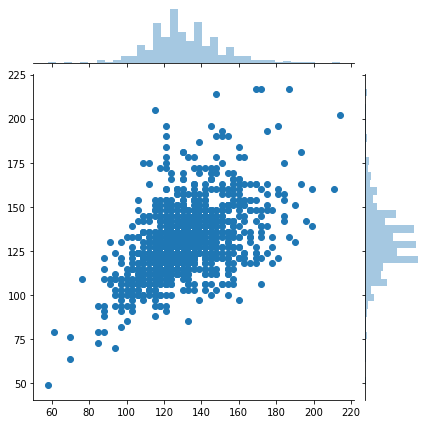

In [18]:
sns.jointplot(dim1, dim2)

In [19]:
np.mean(dim1)

130.92538461538462

In [20]:
np.mean(dim2)

130.75

In [21]:
image_shape = (130, 130, 3)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1,
                               height_shift_range=0.1,
#                              rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

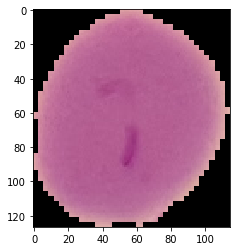

In [24]:
plt.imshow(imread(uninfected_cell))

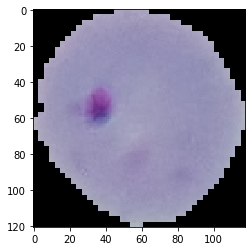

In [25]:
para_img = imread(para_cell)
plt.imshow(para_img)

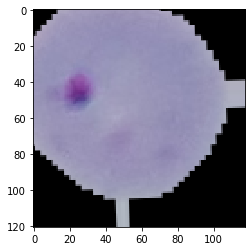

In [26]:
plt.imshow(image_gen.random_transform(para_img))

In [27]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [28]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Dropout, Flatten

In [30]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [32]:
batch_size = 16

In [33]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [34]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [35]:
results = model.fit_generator(train_image_gen, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1560 steps, validate for 163 steps
Epoch 1/20
1560/1560 [==============================] - 362s 232ms/step - loss: 1.0287 - accuracy: 0.5401 - val_loss: 0.6883 - val_accuracy: 0.5315
Epoch 2/20
1560/1560 [==============================] - 338s 217ms/step - loss: 0.6801 - accuracy: 0.5742 - val_loss: 0.6775 - val_accuracy: 0.5627
Epoch 3/20
1560/1560 [==============================] - 349s 224ms/step - loss: 0.6746 - accuracy: 0.5867 - val_loss: 0.6692 - val_accuracy: 0.5896
Epoch 4/20
1560/1560 [==============================] - 365s 234ms/step - loss: 0.6684 - accuracy: 0.5985 - val_loss: 0.6685 - val_accuracy: 0.6081
Epoch 5/20
1560/1560 [==============================] - 371s 238ms/step - loss: 0.4385 - accuracy: 0.7806 - val_loss: 0.2248 - val_accuracy: 0.9204
Epoch 6/20
1560/1560 [==============================] - 370s 237ms/step - loss: 0.1924 - 

In [36]:
# Important
predictions = model.predict_generator(test_image_gen) > 0.5

Instructions for updating:
Please use Model.predict, which supports generators.


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1300
           1       0.93      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [40]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1203,   97],
       [  49, 1251]])

In [41]:
from tensorflow.keras.preprocessing import image

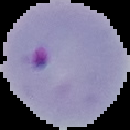

In [42]:
my_image = image.load_img(para_cell, target_size=image_shape)
my_image

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [44]:
my_img_arr = image.img_to_array(my_image)

In [45]:
my_img_arr.shape

(130, 130, 3)

In [46]:
my_img_arr = np.expand_dims(my_img_arr, axis=0)

In [47]:
my_img_arr.shape

(1, 130, 130, 3)

In [48]:
model.predict(my_img_arr)

array([[0.06499528]], dtype=float32)

In [49]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [50]:
model.save('malaria_detector.h5')

In [52]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}